# Models

In [1]:
import numpy as np
import seaborn as sns
from sklearn import cross_validation, grid_search, metrics

from util.dfmgmt import initSet
from util.polarize import *

In [2]:
sns.set(style="whitegrid", font_scale=1)
%matplotlib inline

target = 'charted'  # main feature to be predicted

In [3]:
df = initSet()

In [4]:
# Check head
df.head(10)

,year,decade,unique_words,density,unique_words_raw,density_raw,nouns,verbs,adjectives,syllables,most_used_term,most_used_freq,explicit,total_curses,reading_score,sentiment,charted
0,1961,1960,36,72,65,158,34,30,10,70,rose,7,0,0,2.367848,0.9901,0
1,1961,1960,45,91,74,197,45,37,19,81,name,6,0,0,2.771777,0.9712,1
2,1961,1960,54,103,88,223,45,48,17,98,babi,10,0,0,3.885650,0.9974,1
3,1961,1960,42,148,66,263,81,61,36,76,love,24,0,0,2.889886,0.9993,1
4,1961,1960,28,131,60,354,56,77,5,57,come,38,0,0,2.940000,0.9812,1
5,1961,1960,50,105,79,181,39,40,24,80,mari,13,0,0,3.135470,0.9744,1
6,1961,1960,39,75,70,160,28,35,21,81,take,13,0,0,3.503750,0.9978,1
7,1961,1960,50,94,78,190,62,17,8,83,never,6,0,0,3.074737,-0.9791,1
8,1961,1960,53,63,92,166,25,41,18,105,one,4,0,0,4.993855,-0.2263,1
9,1961,1960,48,57,79,124,29,24,7,83,river,5,0,0,4.648387,-0.3400,1


### Random Forest

In [5]:
df['sentiment_polarity'] = df.apply(sentiment, axis=1)
df['reading_score_level'] = df.apply(reading_score, axis=1)

In [6]:
df_new, features = dummyfy(df, 'sentiment_polarity', 'verbs')

['sentiment_polarity_-1', 'sentiment_polarity_0', 'sentiment_polarity_1', 'verbs']


In [7]:
from sklearn import linear_model

# set X and y and build model
X = df_new[features]
y = df_new[target]

# train model
model = linear_model.LogisticRegression()
model.fit(X, y)
# predict
df_new['probability'] = model.predict_proba(X).T[1]

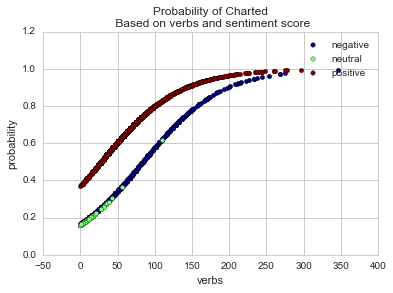

In [8]:
labels = ['negative', 'neutral', 'positive']
plotFeature(df_new, features, 'verbs', 'sentiment score', labels)